In [202]:
# Referral link
# https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/

# Importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose

# load dataset
def parser(x):
    # print(x)
	return datetime.strptime(x, "%d/%m/%Y")

# Read the dataset
data = pd.read_csv('input/McDonald_Test.csv', index_col ='Date', parse_dates = True)
# data = pd.read_csv('./input/McDonald_Test.csv', header=0, index_col='Date', parse_dates=True, squeeze=True, date_parser=parser)
# data.index = data.index.to_period('D')
data.describe()


,Revenue($)
count,64.000000
mean,5.926391
std,0.741447
min,3.762000
25%,5.368500
50%,5.902500
75%,6.510250
max,7.323000


<AxesSubplot:xlabel='Date'>

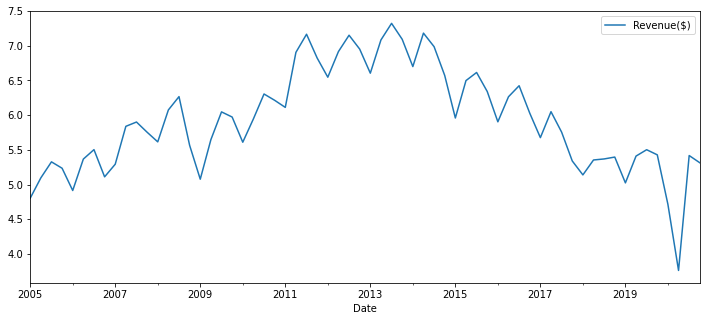

In [203]:
# Print the first five rows of the dataset
data.head()

data.plot(figsize = (12, 5), legend = True)

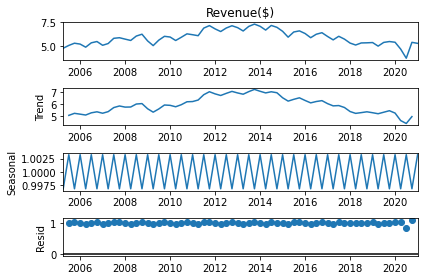

In [213]:
# ETS Decomposition
result = seasonal_decompose(data['Revenue($)'], model='multiplicative')
# model{“additive”, “multiplicative”}, optional

result.plot()
pyplot.show()


In [205]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to dataset
stepwise_fit = auto_arima(data['Revenue($)'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()
# print(model.aic())
# Chỉ số AIC - Akaike Information Criteria: ước tính lỗi dự báo và do đó đánh giá chất lượng tương đối của các mô hình thống kê trên một tập hợp dữ liệu nhất định
# AIC = 2k-2*ln(hat{L})
# AIC càng nhỏ thì mô hình của chúng ta càng phù hợp.

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=54.881, Time=0.10 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=54.689, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=55.655, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=53.671, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=54.755, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=55.482, Time=0.14 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=55.568, Time=0.14 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=54.321, Time=0.06 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.78 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=54.325, Time=0.09 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=53.438, Time=0.10 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=54.077, Time=0.07 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=55.050, Time=0.24 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=55.163, Time=0.21 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=54.146,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   64
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood                 -18.260
Date:                              Sat, 10 Apr 2021   AIC                             48.521
Time:                                      00:51:49   BIC                             60.112
Sample:                                           0   HQIC                            52.950
                                               - 64                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0406      0.024     -1.718      0.086      -0.087       0.006
ma.L1         -0.3768      0.124     -3.038      0.002      -0.620      -0.134
ma.L2         -0.4574      0.198     -2.315      0.021      -0.845      -0.070
ma.L3          0.4057      0.301      1.347      0.178      -0.184       0.996
ma.S.L12      -0.6681      0.519     -1.286      0.198      -1.686       0.350
sigma2         0.1024      0.029      3.534      0.000       0.046       0.159
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                61.39
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               3.04   Skew:                            -0.65
Prob(H) (two-sided):                  0.03   Kurtosis:                         8.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Cách đọc chỉ số:
Bảng trên chính là summary kết quả từ mô hình ARIMA.

- Cột `coef` là giá trị hệ số ước lượng từ mô hình tương ứng với các biến ở cột bên tay trái.
- Cột `std err` là độ lệch chuẩn của hệ số ước lượng. Từ giá trị ước lượng và độ lệch chuẩn ta có thể tính toán ra được khoảng tin cậy. Cận trên và dưới của khoảng tin cậy là các cột [0.025 và 0.975].
- Cột `z` chính là giá trị ngưỡng tới hạn được suy ra từ phân phối chuẩn hóa. Gía trị ngưỡng tới hạn được tính bằng: 
 `z = \frac{\beta-\mu}{u_{\alpha/2}\sigma}`
-  với  là giá trị ước lượng,  là các giá trị trung bình, độ lệch chuẩn của hệ số ước lượng.  là mức phân vị 97.5% của phân phối chuẩn hóa. Do ở đây ta đang kiểm định các giá trị  bằng 0 nên trung bình được giả định bằng 0. Tức là . Nhìn chung là ta không cần quan tâm đến cột này bởi cột `P>|z|` đã thực hiện chức năng thay thế nó trong việc kiểm định các hệ số ước lượng có ý nghĩa thống kê hay không.
- Cột `P>|z|` là xác suất để giá trị  `P(\mid X\mid > 0 \mid X \sim N(0, \sigma^2))`
- . Đây chính là giá trị `P-value` của cặp giả thuyết dấu bằng. Gía trị của `P-value < 0.05` sẽ cho thấy hệ số ước lượng lớn hơn 0 là có ý nghĩa thống kê.

---
Các chỉ số ở góc trên bên phải lần lượt là:

- No. Observations: Số lượng quan sát
- Log Likelihood: Gía trị hàm logarit ước lượng hợp lý tối đa.
- AIC: Chỉ số Akaike Information Criteria
- BIC: Chỉ số Bayesian Information Criteria. Chỉ số này cũng có chức năng đo lường sai số của mô hình như AIC nhưng theo trường phái thống kê suy diễn (statistical inference).

In [206]:
# # Ignore
# from statsmodels.tsa.arima_model import ARIMA

# model_arima = ARIMA(data['Revenue($)'], order = (0, 1, 3))
# model_fit = model_arima.fit()
# print(model_fit.summary())

In [207]:
# # evaluate an ARIMA model using a walk-forward validation
# from pandas import read_csv
# from pandas import datetime
# from matplotlib import pyplot
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# # load dataset

# series = data
# # series.index = series.index.to_period('M')
# # split into train and test sets
# X = series.values
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = list()
# # walk-forward validation
# for t in range(len(test)):
# 	model = ARIMA(history, order=(2, 1, 2))
# 	model_fit = model.fit()
# 	output = model_fit.forecast()
# 	yhat = output[0]
# 	predictions.append(yhat)
# 	obs = test[t]
# 	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
# # evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

In [208]:

# Split data into train / test sets
train = data.iloc[:len(data)-12]
test = data.iloc[len(data)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 3)x(0, 1, [1], 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(data['Revenue($)'], 
                order = (0, 1, 3), 
                seasonal_order =(0, 1, [1], 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Revenue($)   No. Observations:                   64
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood                 -20.239
Date:                              Sat, 10 Apr 2021   AIC                             50.479
Time:                                      00:51:49   BIC                             60.138
Sample:                                  03-31-2005   HQIC                            54.170
                                       - 12-31-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2956      0.128     -2.306      0.021      -0.547      -0.044
ma.L2         -0.3993      0.188     -2.120      0.034      -0.769      -0.030
ma.L3          0.4027      0.303      1.327      0.184      -0.192       0.997
ma.S.L12      -0.4366      0.273     -1.602      0.109      -0.971       0.097
sigma2         0.1211      0.018      6.670      0.000       0.085       0.157
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                63.73
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               3.59   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

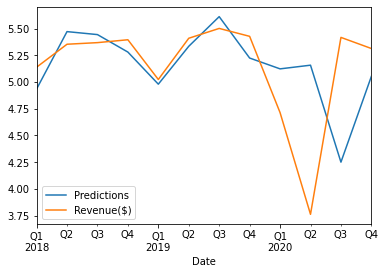

In [209]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Revenue($)'].plot(legend = True)

In [210]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse = rmse(test['Revenue($)'], predictions)
  
# Calculate mean squared error
mse = mean_squared_error(test['Revenue($)'], predictions)

print("rmse: ", rmse)
print("mse: ", mse)

rmse:  0.5540387902049846
mse:  0.30695898105180297


<AxesSubplot:xlabel='Date'>

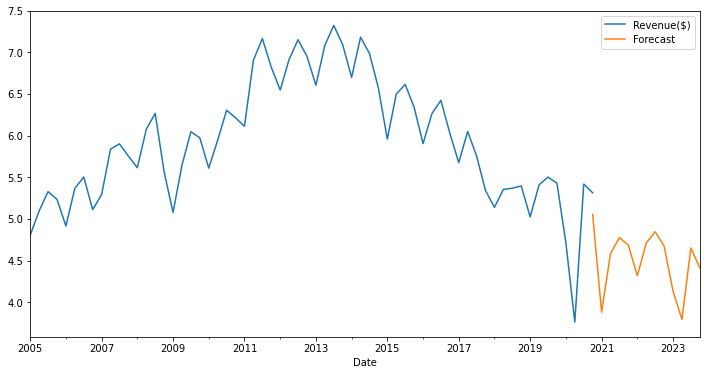

In [211]:
# Train the model on the full dataset
model = SARIMAX(data['Revenue($)'], 
                        order = (0, 1, 3), 
                        seasonal_order =(0, 1, [1], 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(data)-1, 
                          end = (len(data)-1) + 4*3, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
data['Revenue($)'].plot(figsize = (12, 6), legend = True)
forecast.plot(legend = True)

In [212]:
# Kiểm tra lại

# MSE (mean square error): Trung bình tổng bình phương sai số.
# RMSE (root mean square error): Phương sai hoặc độ lệch chuẩn của chuỗi dự báo so với thực tế.
# MAE (mean absolute error): Trung bình trị tuyệt đối sai số. Chính là khoảng cách theo norm chuẩn bậc 1 giữa giá trị dự báo và giá trị thực tế. Dành cho bạn nếu chưa biết về norm chuẩn bậc 1 hoặc L1 norm.
# MAPE (mean absolute percentage error): Trung bình phần trăm trị tuyệt đối sai số. Chỉ số này cho biết giá trị dự báo sai lệch bao nhiêu phần trăm so với giá trị thực tế. Lưu ý ta chỉ tính được chỉ số này chỉ khi giá trị thực tế đều khác 0.
# Các chỉ số này càng nhỏ thì chứng tỏ mô hình dự báo càng khớp với giá trị thực tế. Mô hình có thể được tính toán trên tập test như sau:

def _measure_metric(y, yhat):
  e = y-yhat
  mse=np.mean(e**2)
  rmse=np.sqrt(mse)
  mae=np.mean(np.abs(e))
  mape=np.mean(e/y)

  print('Mean Square Error: {}'.format(mse))
  print('Root Mean Square Error: {}'.format(rmse))
  print('Mean Absolute Error: {}'.format(mae))
  print('Mean Absolute Percentage Error: {}'.format(mape))
  return mse, rmse, mae, mape

mse, rmse, mae, mape=_measure_metric(test['Revenue($)'], forecast)


Mean Square Error: 0.0680501078227149
Root Mean Square Error: 0.2608641558794824
Mean Absolute Error: 0.2608641558794824
Mean Absolute Percentage Error: 0.04908998040637606
